# HW4 Support Vector Machine and Decision Trees

# Due on 11/25 23:59 pm

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

## We will use the same affair dataset from HW3, but will skip the EDA phrase we have done enough of it

#### Everything removing outliers, create dummies variabes had been done for you

In [2]:
# Remember the affair data set from HW3, we will use that dataset again
# but we will directly load it from the API
orig_df = pd.read_csv("affairs2.csv")
# Set up our target class label
orig_df['had_affair'] = orig_df['affairs'].apply(lambda x: 1 if x != 0 else 0)
orig_df = orig_df.drop('affairs',axis=1)
# remove NA
orig_df.dropna(inplace=True)
# create dummies variable for occupation
occ = pd.get_dummies(orig_df['occupation'],drop_first=True)
# we include rate_marriage feature as well. In HW3, we did not include that variable
features = ['rate_marriage','age','yrs_married','children','religious','educ', 'had_affair']
df = orig_df
df = pd.concat([orig_df[features], occ], axis=1)
df.head()

,rate_marriage,age,yrs_married,children,religious,educ,had_affair,occ2,occ3,occ4,occ5,occ6
0,3.0,32.0,9.0,3.0,3.0,17.0,1,1,0,0,0,0
1,3.0,27.0,13.0,3.0,1.0,14.0,1,0,1,0,0,0
2,4.0,22.0,2.5,0.0,1.0,16.0,1,0,1,0,0,0
3,4.0,37.0,16.5,4.0,3.0,16.0,1,0,0,0,1,0
4,5.0,27.0,9.0,1.0,1.0,14.0,1,0,1,0,0,0


In [3]:
# make sure there is no missing values
df.isnull().sum()

rate_marriage    0
age              0
yrs_married      0
children         0
religious        0
educ             0
had_affair       0
occ2             0
occ3             0
occ4             0
occ5             0
occ6             0
dtype: int64

### Now we are ready to build models

### Question 1: Build a classification model using SVC using linear kernel with usual steps

Type your code here

In [4]:
#import the model from sklearn import svm, create the SVC object 
#model = svm.SVC()
#Call Train test split
#print out model performance

In [5]:
from sklearn import svm
model = svm.SVC(C = 1.0, kernel='linear')

#from sklearn import train_test_split
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(df.drop('had_affair',axis=1), 
                                                    df['had_affair'], test_size=0.20, 
                                                    random_state=101)
model.fit(X_train, Y_train)

predictions = model.predict(X_test)

from sklearn.metrics import classification_report, accuracy_score
print(classification_report(Y_test,predictions))
print(accuracy_score(Y_test, predictions))

              precision    recall  f1-score   support

           0       0.72      0.93      0.81       850
           1       0.64      0.27      0.38       424

    accuracy                           0.71      1274
   macro avg       0.68      0.60      0.59      1274
weighted avg       0.69      0.71      0.67      1274

0.707221350078493


### Question 2. Now try different value of C-parameter and rerun your model

Type your code here

In [6]:
from sklearn import svm
model2 = svm.SVC(C = .07, kernel='linear')

from sklearn.model_selection import train_test_split

X_train2, X_test2, Y_train2, Y_test2 = train_test_split(df.drop('had_affair',axis=1), 
                                                    df['had_affair'], test_size=0.20, 
                                                    random_state=101)
model2.fit(X_train2, Y_train2)

predictions2 = model2.predict(X_test2)

from sklearn.metrics import classification_report, accuracy_score
print(classification_report(Y_test2,predictions2))
print(accuracy_score(Y_test2, predictions2))

              precision    recall  f1-score   support

           0       0.72      0.93      0.81       850
           1       0.65      0.26      0.38       424

    accuracy                           0.71      1274
   macro avg       0.69      0.60      0.59      1274
weighted avg       0.70      0.71      0.67      1274

0.7087912087912088


### Question 3. Try using rbf as your kernel and use Gamma of 2**-5, 0.1, 1 and 2

Type your code here

In [7]:
from sklearn import svm
model3 = svm.SVC(C = 1.0, kernel='rbf', gamma = 0.03125)
model4 = svm.SVC(C = 1.0, kernel='rbf', gamma = 0.1)
model5 = svm.SVC(C = 1.0, kernel='rbf', gamma = 1)
model6 = svm.SVC(C = 1.0, kernel='rbf', gamma = 2)

from sklearn.model_selection import train_test_split

X_train3, X_test3, Y_train3, Y_test3 = train_test_split(df.drop('had_affair',axis=1), 
                                                    df['had_affair'], test_size=0.20, 
                                                    random_state=101)
model3.fit(X_train3, Y_train3)
model4.fit(X_train3, Y_train3)
model5.fit(X_train3, Y_train3)
model6.fit(X_train3, Y_train3)

predictions3 = model3.predict(X_test3)
predictions4 = model4.predict(X_test3)
predictions5 = model5.predict(X_test3)
predictions6 = model6.predict(X_test3)


from sklearn.metrics import classification_report, accuracy_score
print(classification_report(Y_test3,predictions3))
print(accuracy_score(Y_test3, predictions3))

print(classification_report(Y_test3,predictions4))
print(accuracy_score(Y_test3, predictions4))

print(classification_report(Y_test3,predictions5))
print(accuracy_score(Y_test3, predictions5))

print(classification_report(Y_test3,predictions6))
print(accuracy_score(Y_test3, predictions6))

              precision    recall  f1-score   support

           0       0.73      0.91      0.81       850
           1       0.64      0.31      0.42       424

    accuracy                           0.71      1274
   macro avg       0.68      0.61      0.61      1274
weighted avg       0.70      0.71      0.68      1274

0.7111459968602826
              precision    recall  f1-score   support

           0       0.72      0.89      0.80       850
           1       0.59      0.31      0.41       424

    accuracy                           0.70      1274
   macro avg       0.66      0.60      0.60      1274
weighted avg       0.68      0.70      0.67      1274

0.7001569858712716
              precision    recall  f1-score   support

           0       0.70      0.87      0.77       850
           1       0.47      0.24      0.32       424

    accuracy                           0.66      1274
   macro avg       0.58      0.55      0.55      1274
weighted avg       0.62      0.66   

### Question 4. So out of all the models you try in Question 3 and 4, what is the best choice for the kernel, C and gamma parameters?

Type your answer here

Out of all the models I used, the model with the highest accuracy is the one with that used a rbf kernal with C =1, and gamma parameter of 2^-5.

# Now we will try to fit the same dataset with Decision Trees

### Question 5. Build a Decision Tree Classifier using default parameter

Type your code here

In [8]:
from sklearn.model_selection import train_test_split

X_train4, X_test4, Y_train4, Y_test4 = train_test_split(df.drop('had_affair',axis=1), 
                                                    df['had_affair'], test_size=0.20, 
                                                    random_state=101)

from sklearn.tree import DecisionTreeClassifier
model7 = DecisionTreeClassifier()
model7.fit(X_train4,Y_train4)

from sklearn.metrics import classification_report,confusion_matrix,accuracy_score

predictions7 = model7.predict(X_test4)
print(confusion_matrix(Y_test4,predictions7))
print(classification_report(Y_test4,predictions7))
print(accuracy_score(Y_test4, predictions7))

[[648 202]
 [260 164]]
              precision    recall  f1-score   support

           0       0.71      0.76      0.74       850
           1       0.45      0.39      0.42       424

    accuracy                           0.64      1274
   macro avg       0.58      0.57      0.58      1274
weighted avg       0.63      0.64      0.63      1274

0.6373626373626373


### Question 6. Now try using max_depth = 2, 3, 4 and crierion = 'gini' and 'entropy' to build 3 X 2 = 6 different models

Type your code here

In [9]:
model8 = DecisionTreeClassifier(max_depth=2, criterion='entropy')
model8.fit(X_train4,Y_train4)
model9 = DecisionTreeClassifier(max_depth=3, criterion='entropy')
model9.fit(X_train4,Y_train4)
model10 = DecisionTreeClassifier(max_depth=4, criterion='entropy')
model10.fit(X_train4,Y_train4)

model11 = DecisionTreeClassifier(max_depth=2, criterion='gini')
model11.fit(X_train4,Y_train4)
model12 = DecisionTreeClassifier(max_depth=3, criterion='gini')
model12.fit(X_train4,Y_train4)
model13 = DecisionTreeClassifier(max_depth=4, criterion='gini')
model13.fit(X_train4,Y_train4)

from sklearn.metrics import classification_report,confusion_matrix,accuracy_score
print("Max_depth 2, entropy")
predictions8 = model8.predict(X_test4)
print(confusion_matrix(Y_test4,predictions8))
print(classification_report(Y_test4,predictions8))
print(accuracy_score(Y_test4, predictions8))

from sklearn.metrics import classification_report,confusion_matrix,accuracy_score
print("Max_depth 3, entropy")
predictions9 = model9.predict(X_test4)
print(confusion_matrix(Y_test4,predictions9))
print(classification_report(Y_test4,predictions9))
print(accuracy_score(Y_test4, predictions9))

from sklearn.metrics import classification_report,confusion_matrix,accuracy_score
print("Max_depth 4, entropy")
predictions10 = model10.predict(X_test4)
print(confusion_matrix(Y_test4,predictions10))
print(classification_report(Y_test4,predictions10))
print(accuracy_score(Y_test4, predictions10))

from sklearn.metrics import classification_report,confusion_matrix,accuracy_score
print("Max_depth 2, gini")
predictions11 = model11.predict(X_test4)
print(confusion_matrix(Y_test4,predictions11))
print(classification_report(Y_test4,predictions11))
print(accuracy_score(Y_test4, predictions11))

from sklearn.metrics import classification_report,confusion_matrix,accuracy_score
print("Max_depth 3, gini")
predictions12 = model12.predict(X_test4)
print(confusion_matrix(Y_test4,predictions12))
print(classification_report(Y_test4,predictions12))
print(accuracy_score(Y_test4, predictions12))

from sklearn.metrics import classification_report,confusion_matrix,accuracy_score
print("Max_depth 4, gini")
predictions13 = model13.predict(X_test4)
print(confusion_matrix(Y_test4,predictions13))
print(classification_report(Y_test4,predictions13))
print(accuracy_score(Y_test4, predictions13))

Max_depth 2, entropy
[[765  85]
 [290 134]]
              precision    recall  f1-score   support

           0       0.73      0.90      0.80       850
           1       0.61      0.32      0.42       424

    accuracy                           0.71      1274
   macro avg       0.67      0.61      0.61      1274
weighted avg       0.69      0.71      0.67      1274

0.7056514913657771
Max_depth 3, entropy
[[734 116]
 [277 147]]
              precision    recall  f1-score   support

           0       0.73      0.86      0.79       850
           1       0.56      0.35      0.43       424

    accuracy                           0.69      1274
   macro avg       0.64      0.61      0.61      1274
weighted avg       0.67      0.69      0.67      1274

0.6915227629513344
Max_depth 4, entropy
[[761  89]
 [290 134]]
              precision    recall  f1-score   support

           0       0.72      0.90      0.80       850
           1       0.60      0.32      0.41       424

    accuracy

### Question 7. What is your obsevation from Question 6? Does the choice of the criterion important in this case? What about the max_depth? What is the best choice of max_depth and criterion?

Type your answer here

In my observation from question 6, I noticed that the max_depth does affect the accuracy, max depth of 2 yields higher accuracy then max depth of 3 and 4. The criterion doesnt affect the accuracy.

## Tree Visualization

Scikit learn actually has some built-in visualization capabilities for decision trees, you won't use this often and it requires you to install the pydot library, but here is an example of what it looks like and the code to execute this:

In [10]:
from IPython.display import Image  
from sklearn.externals.six import StringIO  
from sklearn.tree import export_graphviz
import io
import pydot 

features = list(df.columns[1:])
features

/Users/deveshwarsingh/anaconda3/lib/python3.7/site-packages/sklearn/externals/six.py:31: DeprecationWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", DeprecationWarning)


['age',
 'yrs_married',
 'children',
 'religious',
 'educ',
 'had_affair',
 'occ2',
 'occ3',
 'occ4',
 'occ5',
 'occ6']

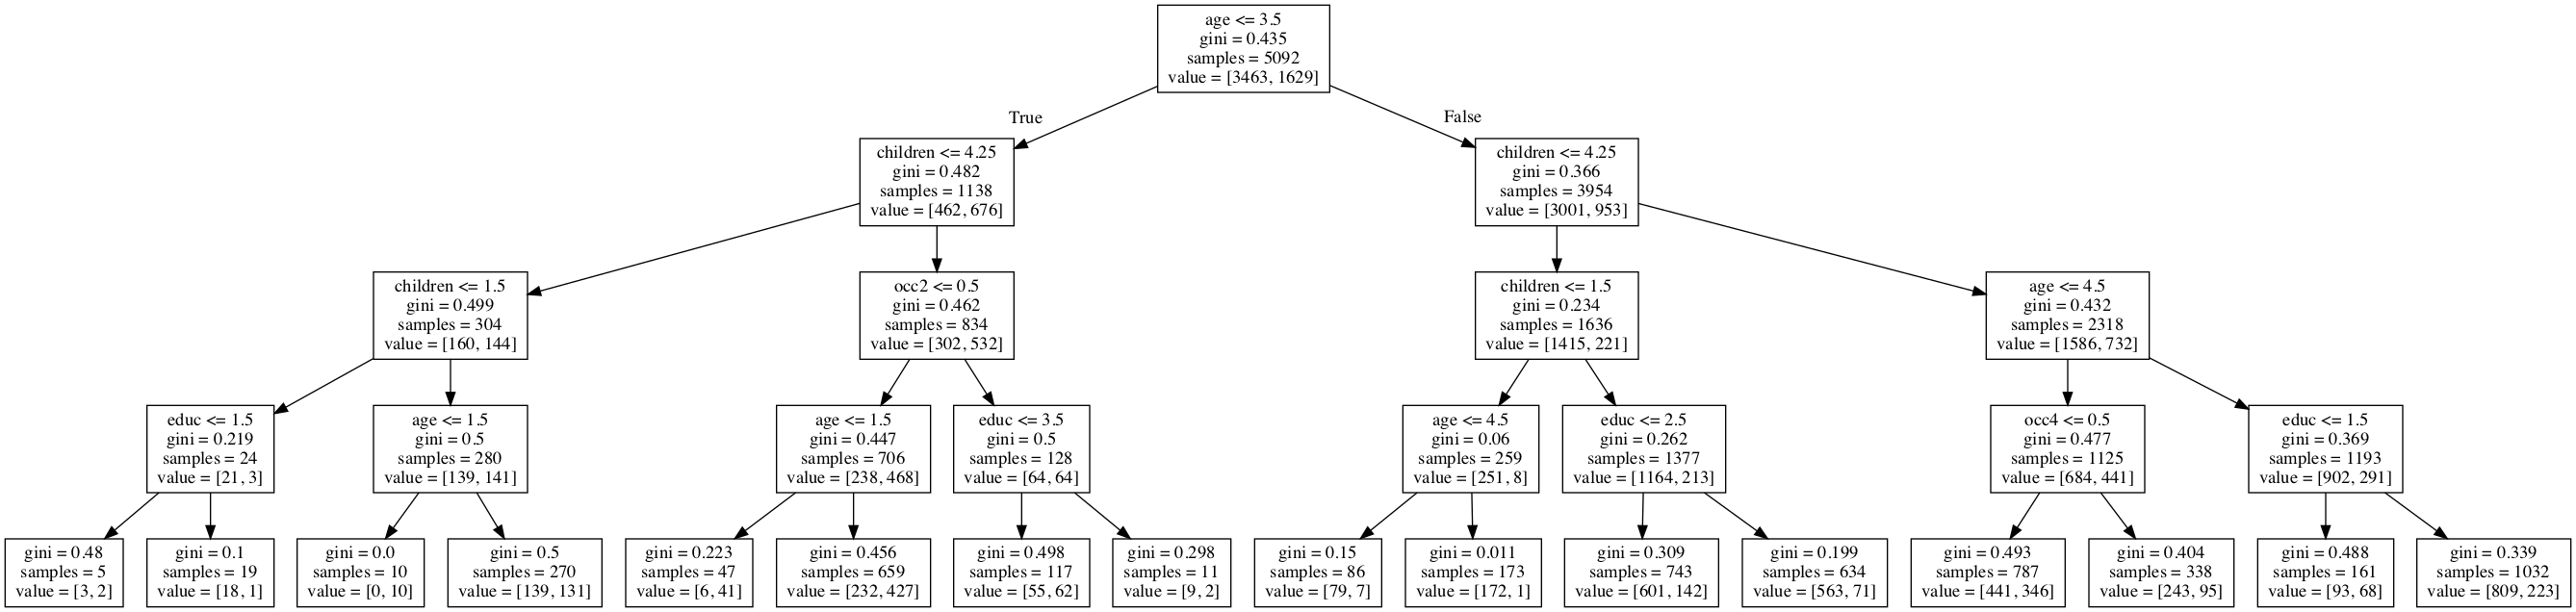

In [11]:
dot_data = StringIO()  
export_graphviz(model13, out_file=dot_data, feature_names=features)
(graph, ) = pydot.graph_from_dot_data(dot_data.getvalue())
Image(graph.create_png())

### Question 8, now pick three models, with max_depth = 2, 3 and 4. You can pick the which ever criterions you want and visual the three trees

Type your code here

In [12]:
# Hint 
# model1 = DecisionTreeClassifier(max_depth=..., criterion= ...)
# model1.fit(X_train, y_train)
# model2 = DecisionTreeClassifier(max_depth=..., criterion= ...)
# model2.fit(X_train, y_train)
# model3 = DecisionTreeClassifier(max_depth=..., criterion= ...)
# model3.fit(X_train, y_train)
# Then display all 3 trees
# 

#dot_data = StringIO()  
#export_graphviz(model1, out_file=dot_data, feature_names=features)
#graph = pydot.graph_from_dot_data(dot_data.getvalue())
#Image(graph[0].create_png())

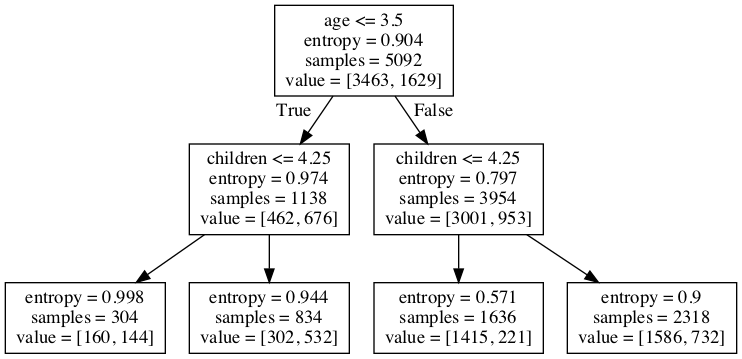

In [13]:
from IPython.display import Image  
from sklearn.externals.six import StringIO  
from sklearn.tree import export_graphviz
import io
import pydot 

features = list(df.columns[1:])
features

#using model8, model9, model10

dot_data = StringIO()  
export_graphviz(model8, out_file=dot_data, feature_names=features)
graph = pydot.graph_from_dot_data(dot_data.getvalue())
Image(graph[0].create_png())



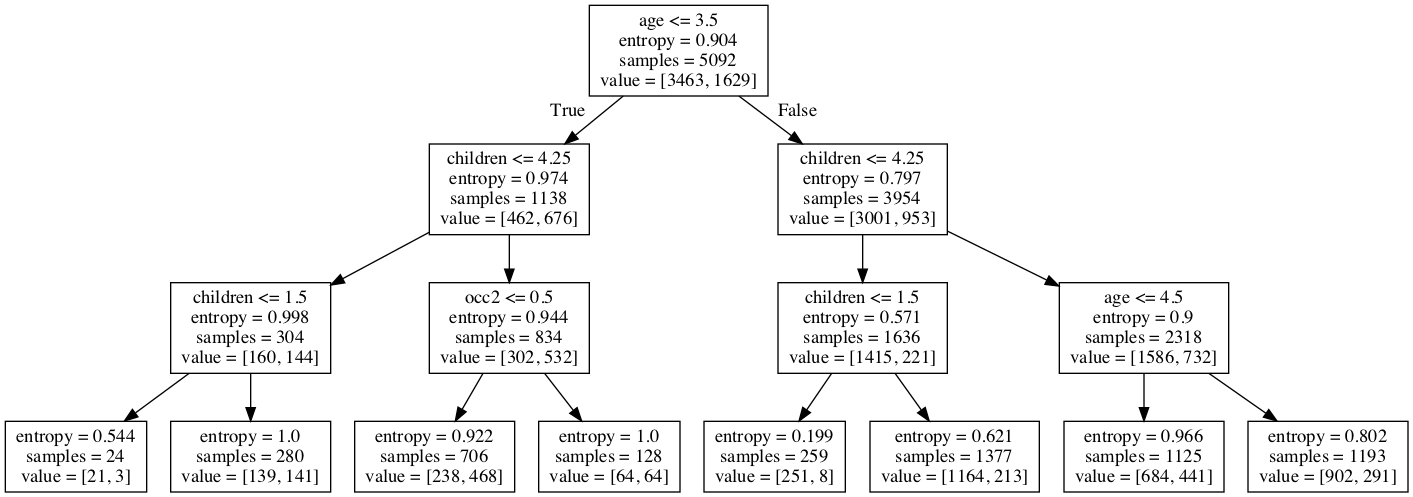

In [14]:
dot_data = StringIO()  
export_graphviz(model9, out_file=dot_data, feature_names=features)
graph = pydot.graph_from_dot_data(dot_data.getvalue())
Image(graph[0].create_png())

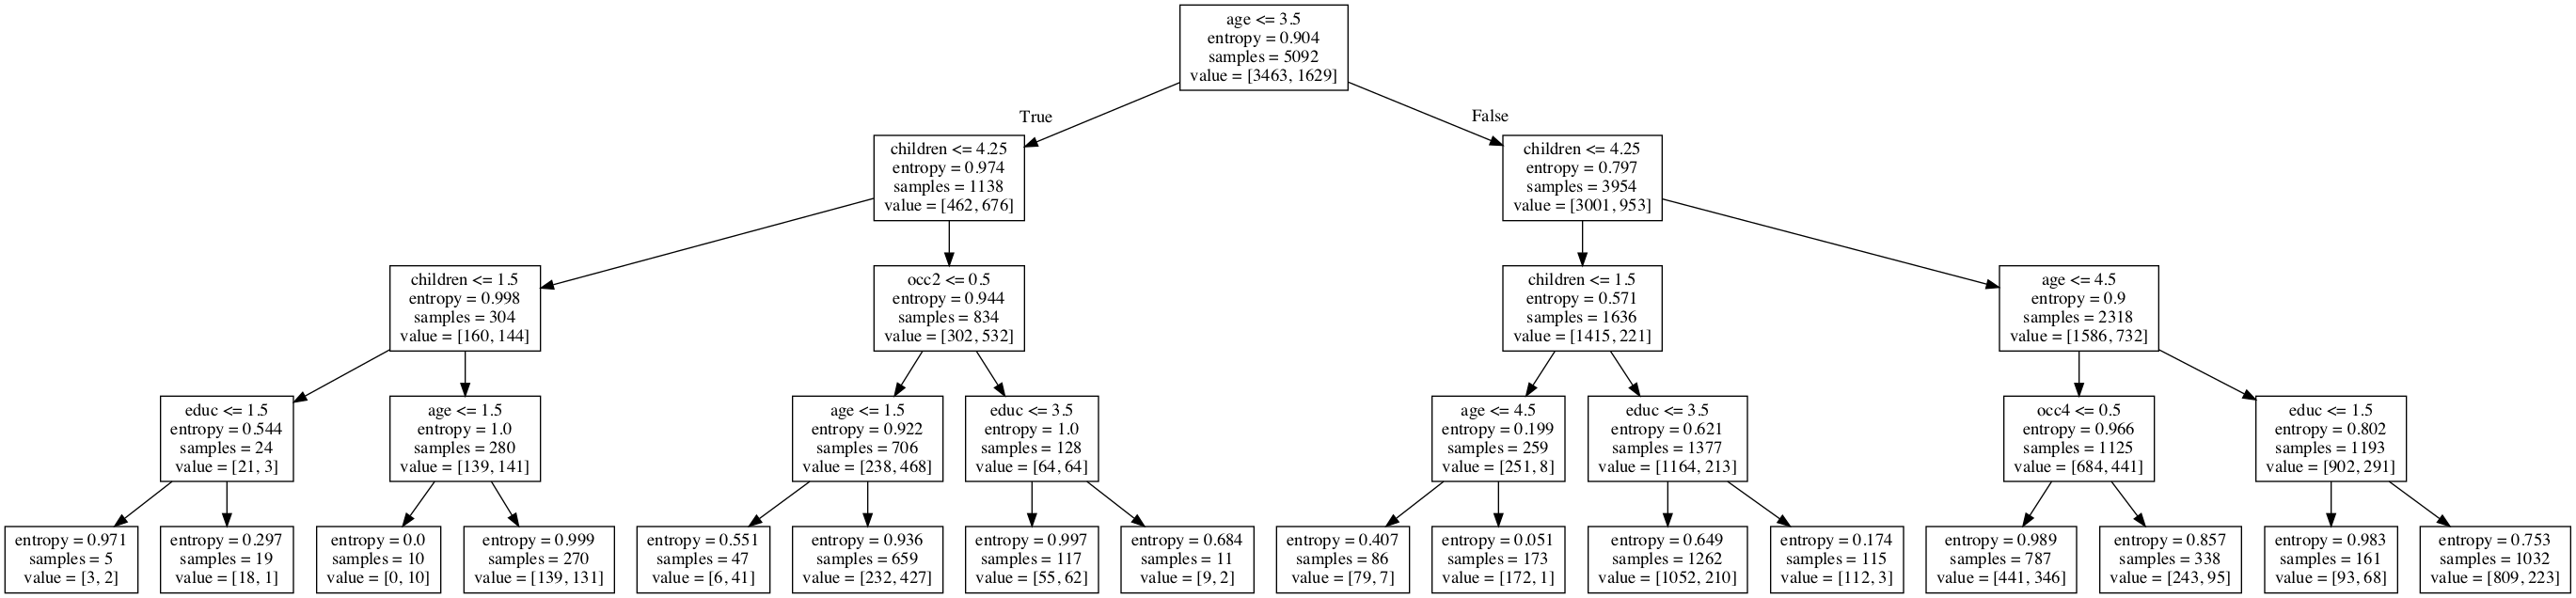

In [15]:
dot_data = StringIO()  
export_graphviz(model10, out_file=dot_data, feature_names=features)
graph = pydot.graph_from_dot_data(dot_data.getvalue())
Image(graph[0].create_png())

### Question 9. Now build a Random Forest Classifier with, say, 100 trees. Check the model performance 

In [16]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(n_estimators=100)
rfc.fit(X_train4, Y_train4)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [17]:
rfc_pred = rfc.predict(X_test4)
print(classification_report(Y_test4,predictions8))
print(accuracy_score(Y_test4, predictions8))

              precision    recall  f1-score   support

           0       0.73      0.90      0.80       850
           1       0.61      0.32      0.42       424

    accuracy                           0.71      1274
   macro avg       0.67      0.61      0.61      1274
weighted avg       0.69      0.71      0.67      1274

0.7056514913657771


The model has a accuracy of 70%, a Precision of 73%, and a recall of 90%. This means the precision, only 73% of them are actually no affair. The recall for no affair is 90% which means out of all the total number of actual no affairs, we were able to capture 90% of them correctly. This resulted in a f1-score of 80%. We have 70% on average.